# 텍스트 군집 분석

In [23]:
import matplotlib
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
fontprop = fm.FontProperties(fname=fontpath, size=8) 

In [24]:
#폰트종류설정
plt.rcParams["font.family"] = 'NanumGothic'

#폰트크기설정
#plt.rcParams["font.size"] = 20

## 데이터 전처리

In [25]:
import konlpy
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

/tmp/ipykernel_73818/691330863.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')
2023-03-15 07:26:12.789987: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-15 07:26:12.968292: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`

In [26]:
file = open('./data/stop_word.txt', 'r')

stopWord = []
l = ''
while True:
    l = file.readline()
    stopWord.append(l[:-1])
    if l == '':
        break

In [27]:
len(stopWord)

676

In [28]:
import pandas as pd
import numpy as np
data_df = pd.read_csv('./data/ulsan_rest_review.csv')
data_df.head()

place_id user_id  score                                            comment
0  225토마토스트릿      cu    5.0            분위기가 진짜 미쳤습니다. 외부와 단절된 느낌으로다가 아늑하고 좋아요.
1  225토마토스트릿     냠념뇸    4.0  코스로 먹었습니다. 초반 에피타이져는 굉장히 맛있었는데 파스타가 너무 짜서 뒤에 스...
2  225토마토스트릿      김영    2.0  너무 어둡고 밀폐된 공간에 벨을 누르고 문 열어주면 입장에 허걱.카프레제 샐러드는 ...
3  225토마토스트릿    애니비아    2.0  일단 특이하게 벨 누르는? 인테리어도 특이하고 이런 식당이 많이 없으니까 신기하긴 ...
4  225토마토스트릿   라떼처돌이    5.0    다 맛있음! 뭘 시켜도 맛있을 것같음.양이 보기보다 많아 배에 차곡차곡 쌓이는 느낌.

In [29]:
print(data_df['comment'].nunique())
print(data_df['score'].nunique())

data_df.drop_duplicates(subset=['comment'], inplace=True)

5173
5


In [30]:
print(data_df.isnull().sum())

data_df = data_df.dropna(how='any')

place_id     0
user_id     18
score        0
comment      1
dtype: int64


In [31]:
data_df['comment'] = data_df['comment'].str.replace("[^ㄱ-하-ㅣ가-힣 ]", "")

/tmp/ipykernel_73818/2728893579.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data_df['comment'] = data_df['comment'].str.replace("[^ㄱ-하-ㅣ가-힣 ]", "")


In [32]:
data_df['comment'].replace('', np.nan, inplace=True)
print(len(data_df))
print(data_df.isnull().sum())

5155
place_id     0
user_id      0
score        0
comment     13
dtype: int64


In [33]:
data_df.head()

place_id user_id  score                                            comment
0  225토마토스트릿      cu    5.0              분위기가 진짜 미쳤습니다 외부와 단절된 느낌으로다가 아늑하고 좋아요
1  225토마토스트릿     냠념뇸    4.0  코스로 먹었습니다 초반 에피타이져는 굉장히 맛있었는데 파스타가 너무 짜서 뒤에 스테...
2  225토마토스트릿      김영    2.0  너무 어둡고 밀폐된 공간에 벨을 누르고 문 열어주면 입장에 허걱카프레제 샐러드는 너...
3  225토마토스트릿    애니비아    2.0  일단 특이하게 벨 누르는 인테리어도 특이하고 이런 식당이 많이 없으니까 신기하긴 함...
4  225토마토스트릿   라떼처돌이    5.0       다 맛있음 뭘 시켜도 맛있을 것같음양이 보기보다 많아 배에 차곡차곡 쌓이는 느낌

In [34]:
from konlpy.tag import Mecab

mecab =Mecab()

reviews = []
for sentence in data_df['comment']:
    reviews.append([word for word in mecab.morphs(str(sentence)) if not word in stopWord])

reviews[:3]

[['분위기', '진짜', '미쳤', '외부', '단절', '된', '느낌', '다가', '아늑', '고', '좋', '아요'],
 ['코스',
  '먹',
  '었',
  '초반',
  '피타',
  '져',
  '는',
  '굉장히',
  '맛있',
  '었',
  '는데',
  '파스타',
  '너무',
  '짜',
  '서',
  '뒤',
  '스테이크',
  '맛',
  '안',
  '느껴져서',
  '아쉽',
  '브루',
  '쉐타',
  '스프',
  '는',
  'ㄹ',
  'ㅇ',
  '존',
  '맛'],
 ['너무',
  '어둡',
  '고',
  '밀폐',
  '된',
  '공간',
  '벨',
  '누르',
  '고',
  '문',
  '열',
  '주',
  '면',
  '입장',
  '카프레',
  '샐러드',
  '는',
  '너무',
  '짜',
  '서',
  '남김',
  '그나마',
  '스테이크',
  '는',
  '먹',
  '만',
  '함']]

## Word2Vec 생성

In [35]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

In [36]:
word2vec = Word2Vec(reviews, min_count=3, vector_size=100, window=5)
word2vec

## t-sne을 활용한 시각화

In [37]:
tsne = TSNE(n_components=2) # n_components는 차원을 뜻함 

In [38]:
vocab = word2vec.wv.key_to_index
similarity = word2vec.wv[vocab]

In [39]:
word2vec.wv.most_similar('친절')

[('직원', 0.9625000953674316),
 ('분', 0.947101891040802),
 ('사장', 0.9028223156929016),
 ('시', 0.9009259939193726),
 ('부모', 0.89398193359375),
 ('바쁜데', 0.8903656005859375),
 ('셔서', 0.8838064670562744),
 ('모시', 0.8798925280570984),
 ('도', 0.8745944499969482),
 ('서비스', 0.8711250424385071)]

In [40]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity) # 전체 similarity를 tsne n_components만큼 변형 ex n=2 -> 2차원
df = pd.DataFrame(transform_similarity, index=vocab, columns=['x', 'y'])
df[0:10]

x         y
고   52.433720  2.035499
는   68.999977  2.118644
도   51.577866  0.962294
은   64.203789 -0.930961
맛있  50.532967  2.835737
먹   50.238380  4.966554
좋   51.303036  0.227647
맛   53.085720 -0.030469
어요  50.483967  2.891106
는데  60.143227  1.692286

/tmp/ipykernel_73818/1428379346.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


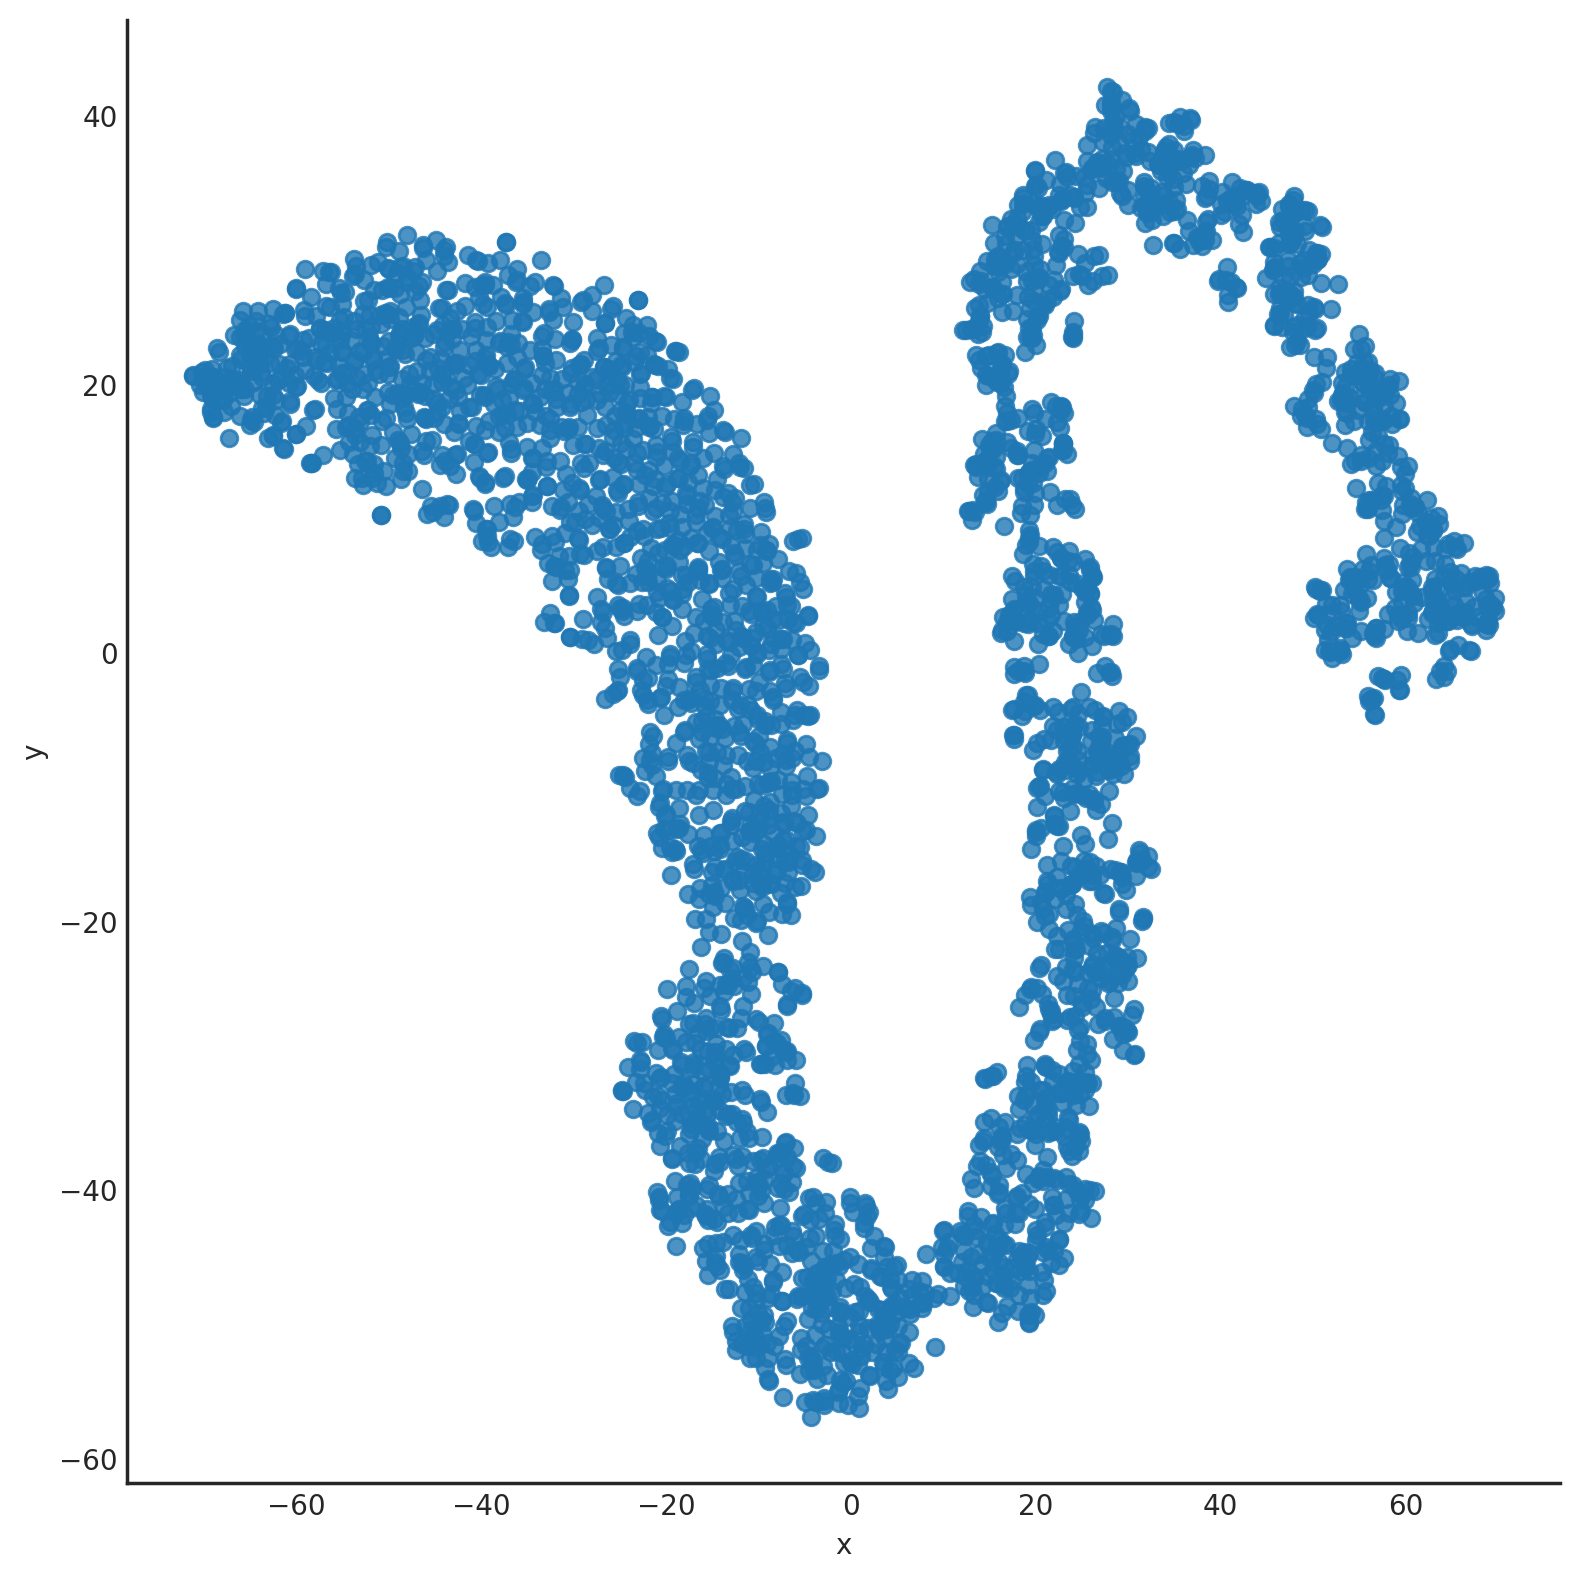

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

sns.lmplot(x= 'x',y= 'y', data=df, fit_reg=False, height=8)
plt.show()

## 군집화

### 계층적 군집화

#### ward

In [48]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
predict = ward.fit_predict(df)
predict

array([5, 5, 5, ..., 1, 3, 1])

In [49]:
results = df
results['predict'] = predict
results[:10]

x         y  predict
고   52.433720  2.035499        5
는   68.999977  2.118644        5
도   51.577866  0.962294        5
은   64.203789 -0.930961        5
맛있  50.532967  2.835737        5
먹   50.238380  4.966554        5
좋   51.303036  0.227647        5
맛   53.085720 -0.030469        5
어요  50.483967  2.891106        5
는데  60.143227  1.692286        5

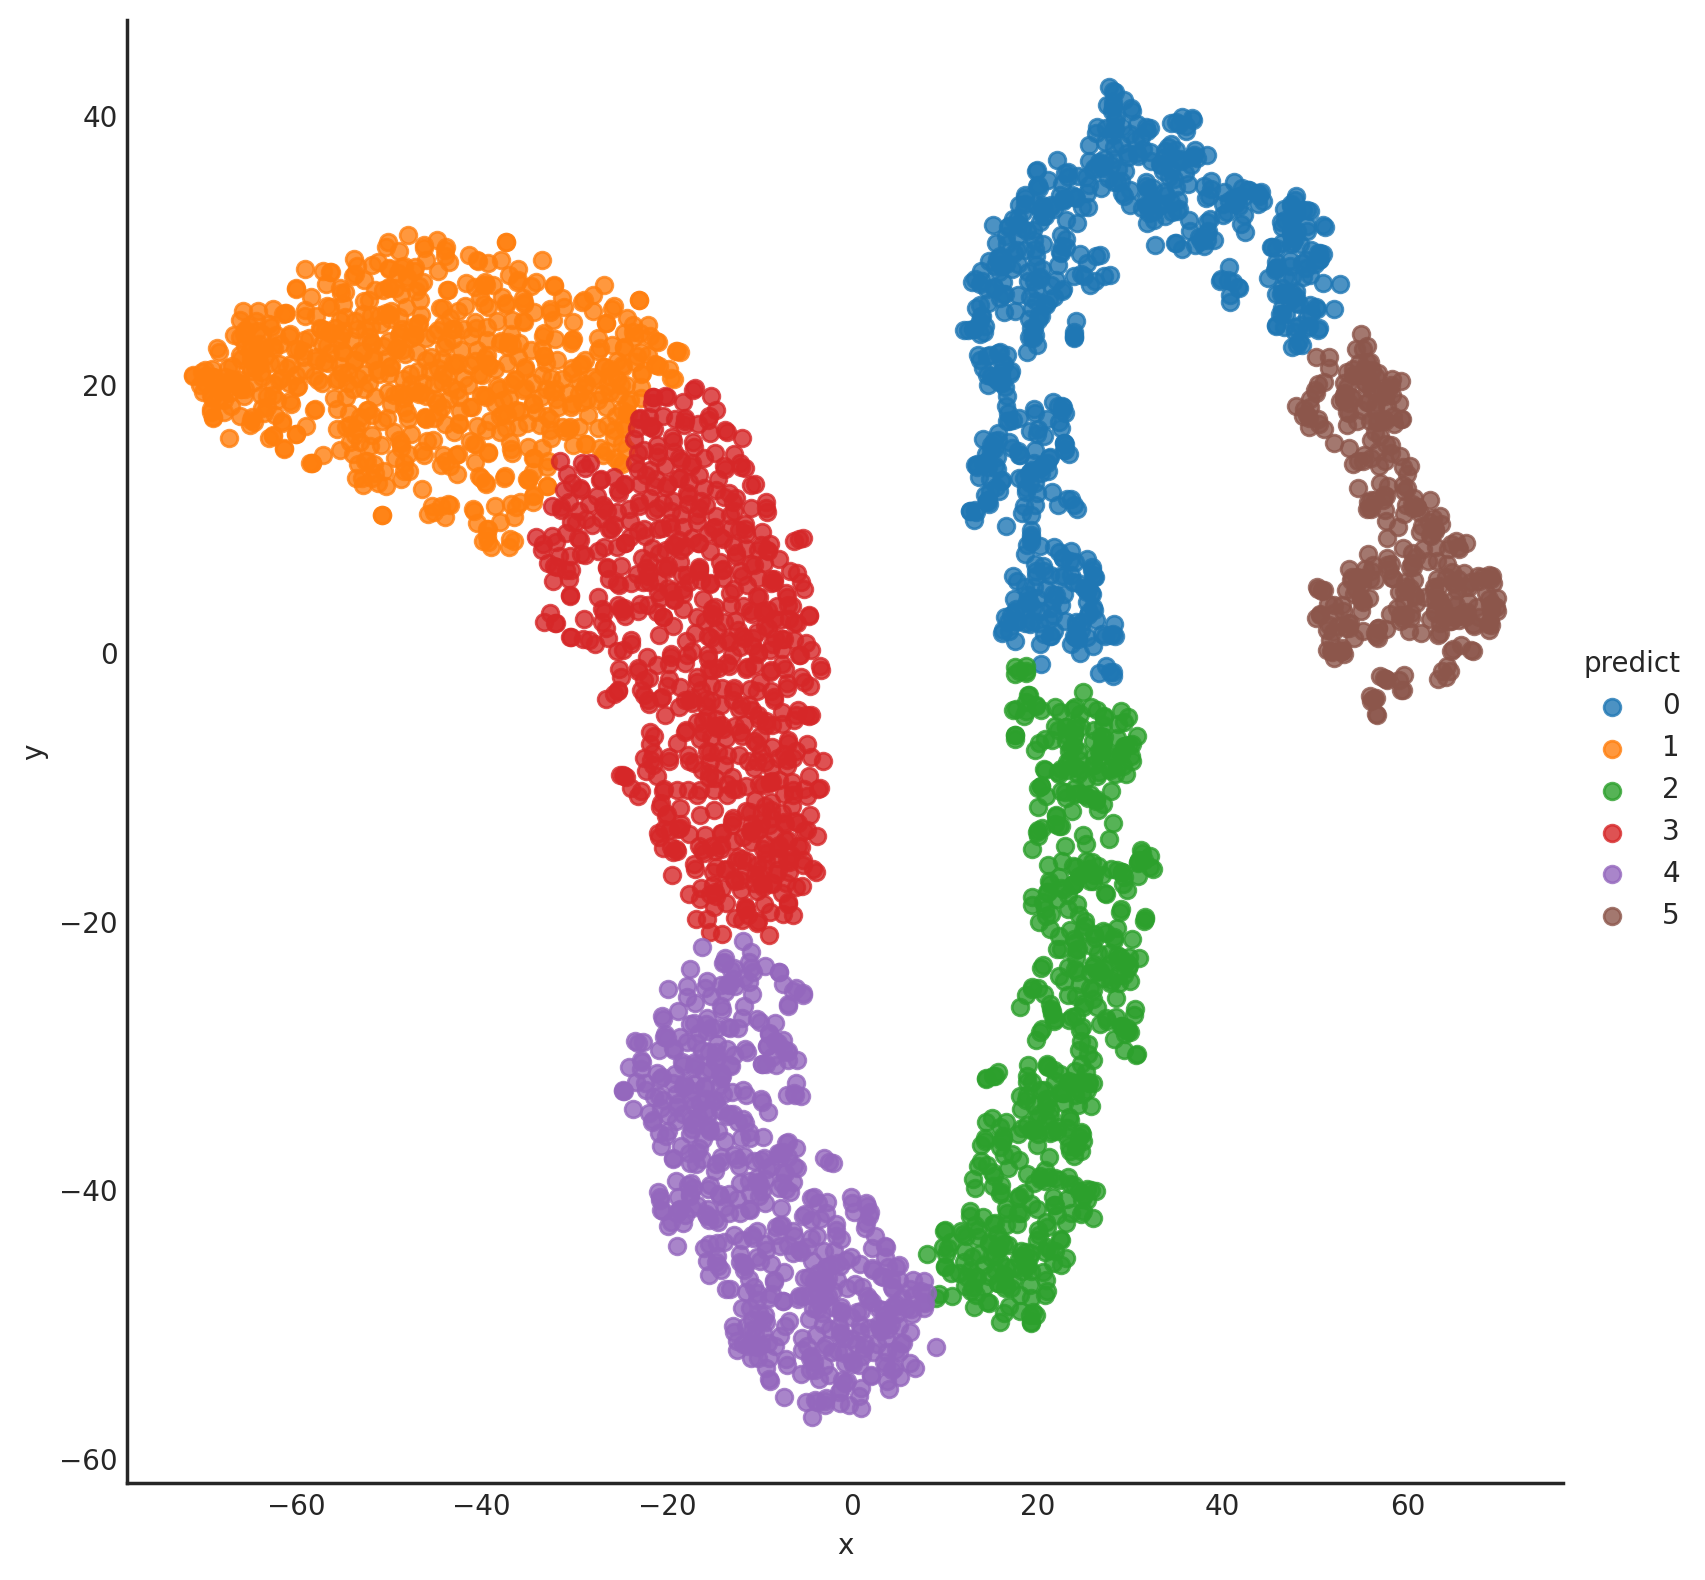

In [50]:
sns.lmplot(x= 'x',y= 'y', data=df, fit_reg=False, height=8, hue='predict')
plt.show()

#### average

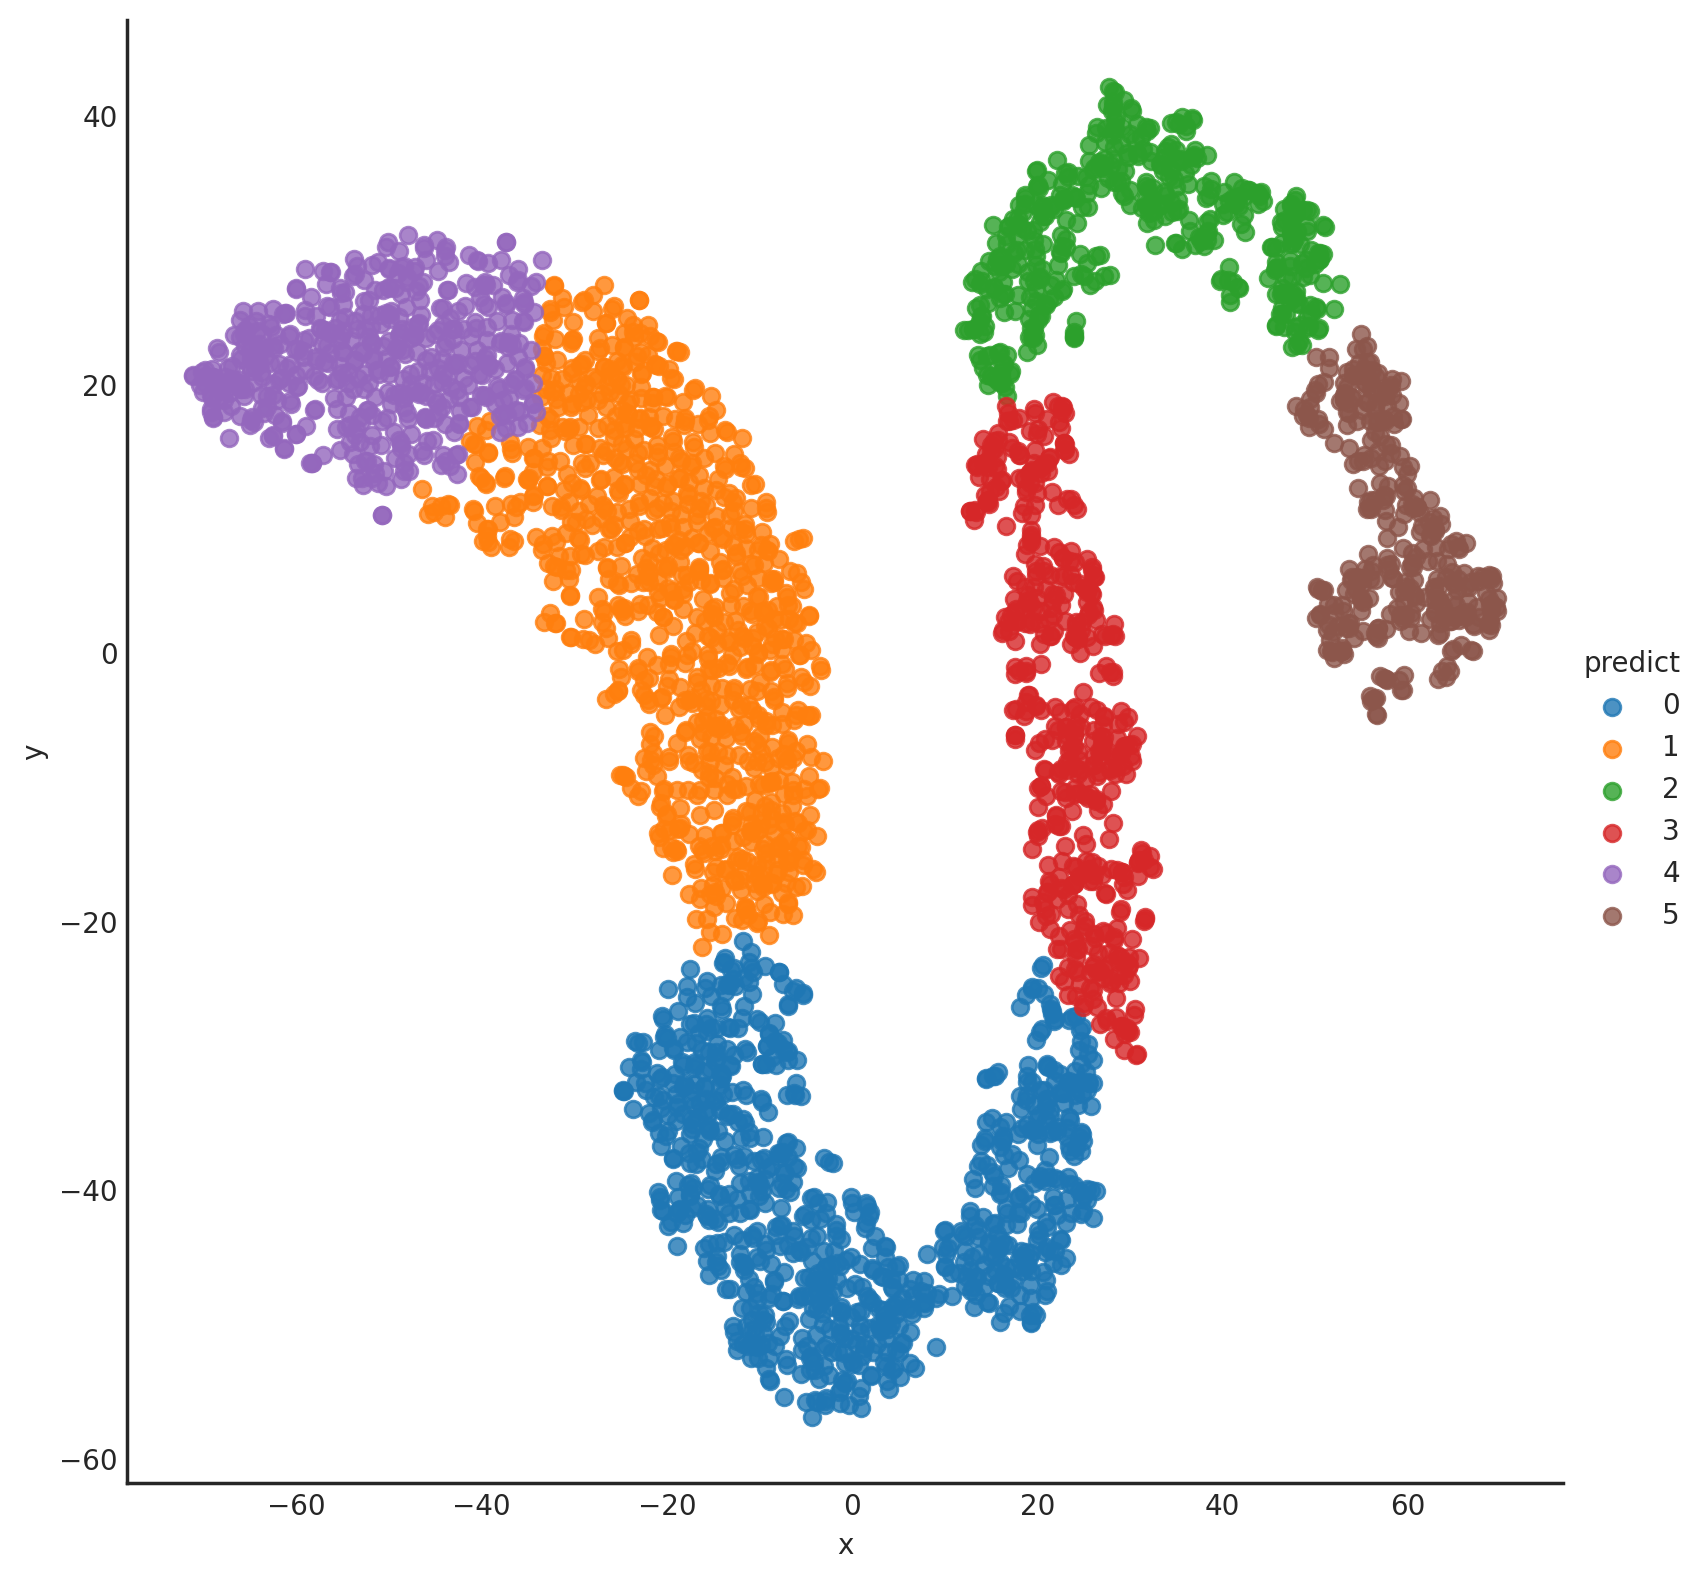

In [53]:
avg = AgglomerativeClustering(n_clusters=6, linkage='average')
predict= avg.fit_predict(df)
results = df
results['predict'] = predict
sns.lmplot(x= 'x',y= 'y', data=df, fit_reg=False, height=8, hue='predict')
plt.show()


#### complete

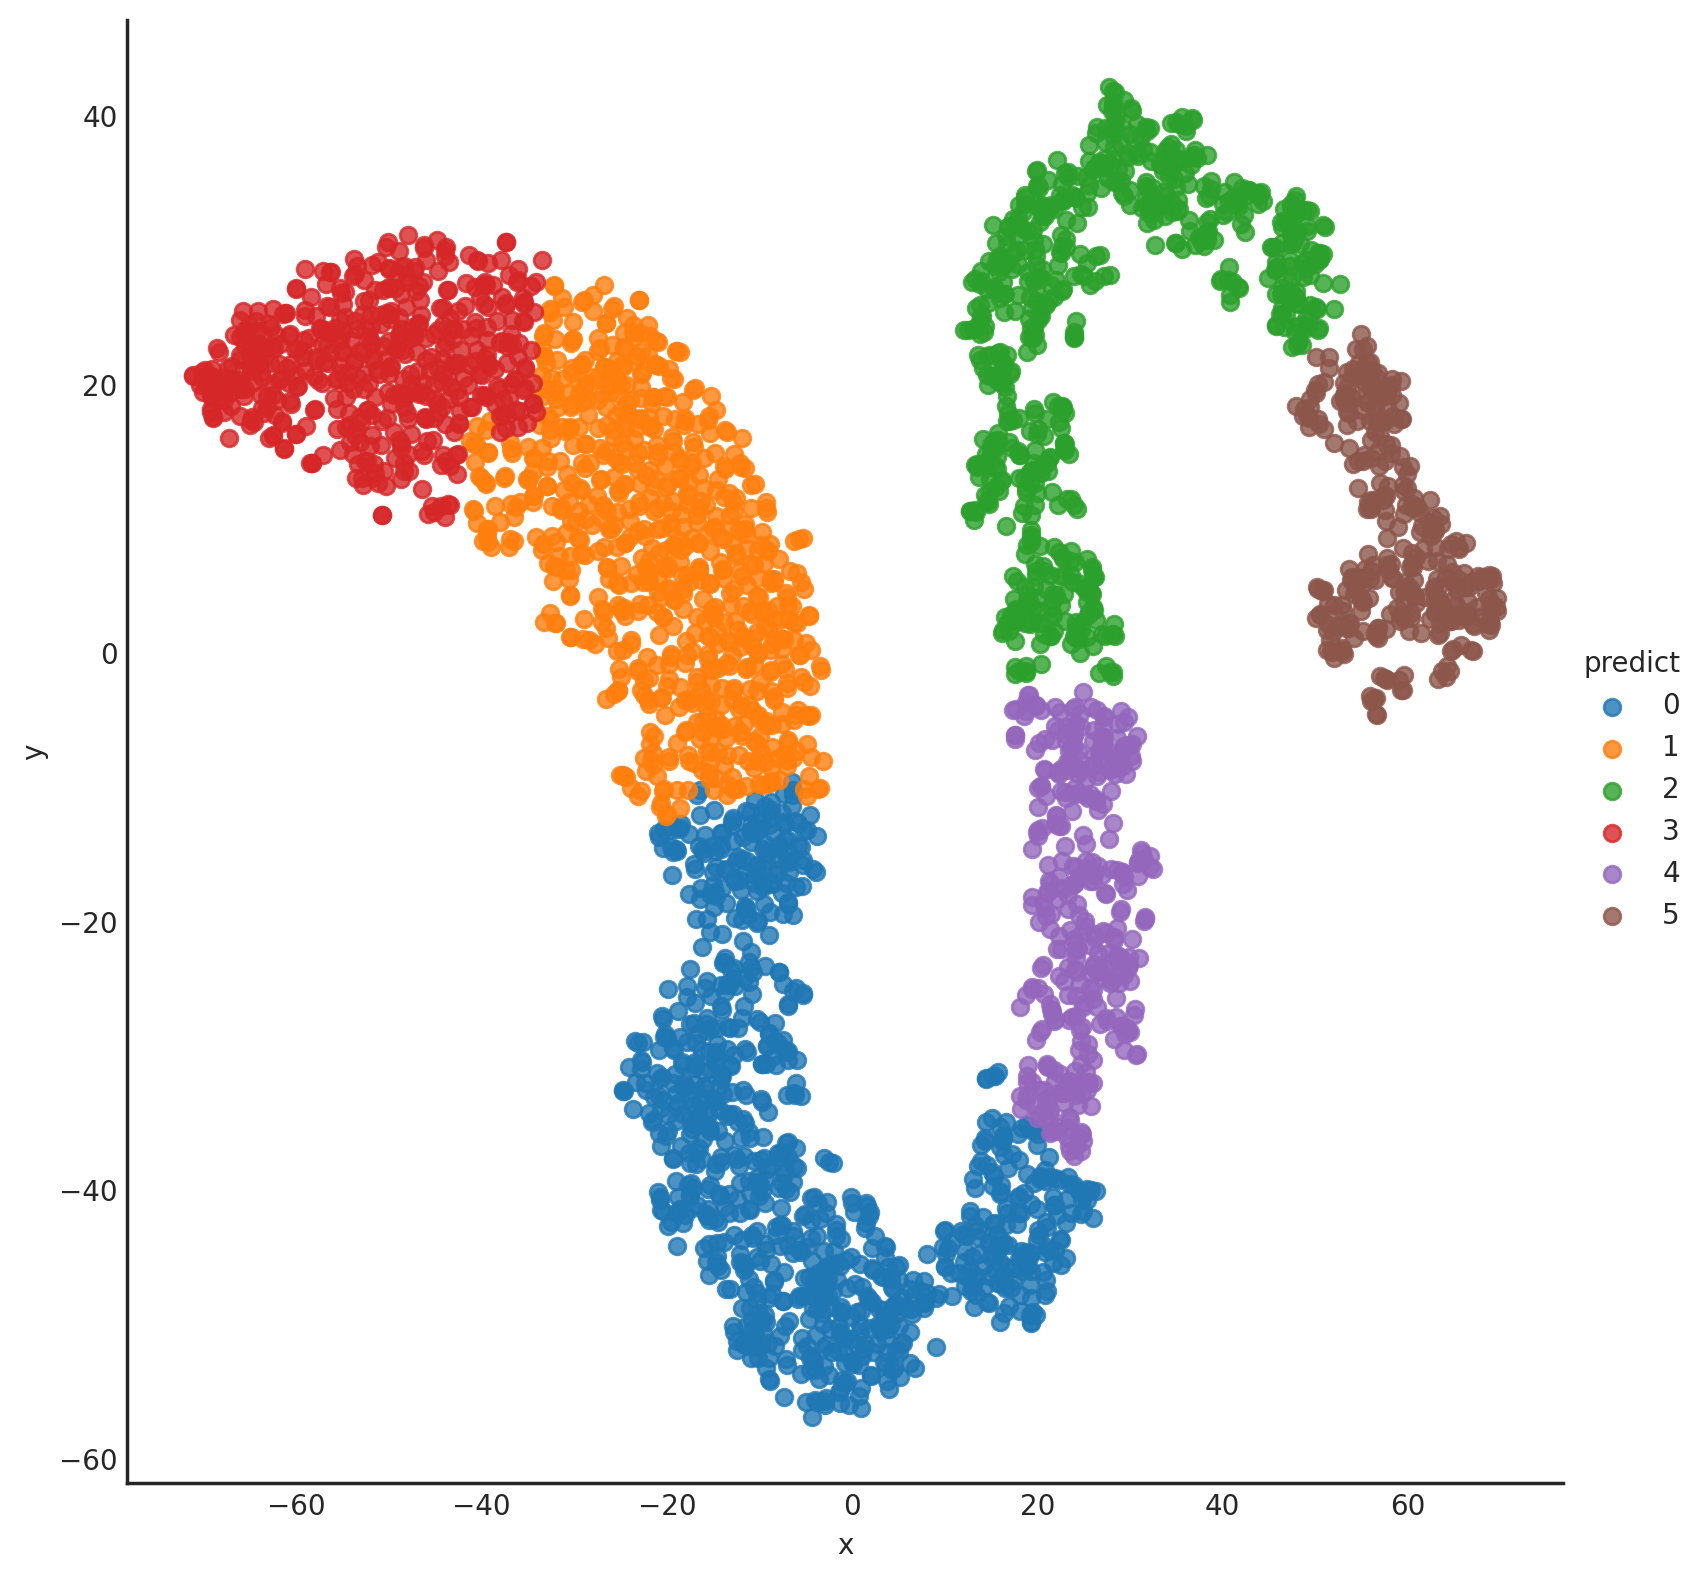

In [54]:
compl = AgglomerativeClustering(n_clusters=6, linkage='complete')
predict = compl.fit_predict(df)
results = df
results['predict'] = predict
results[:10]
sns.lmplot(x= 'x',y= 'y', data=df, fit_reg=False, height=8, hue='predict')
plt.show()


### 비계층적 군집화

#### K-Means

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


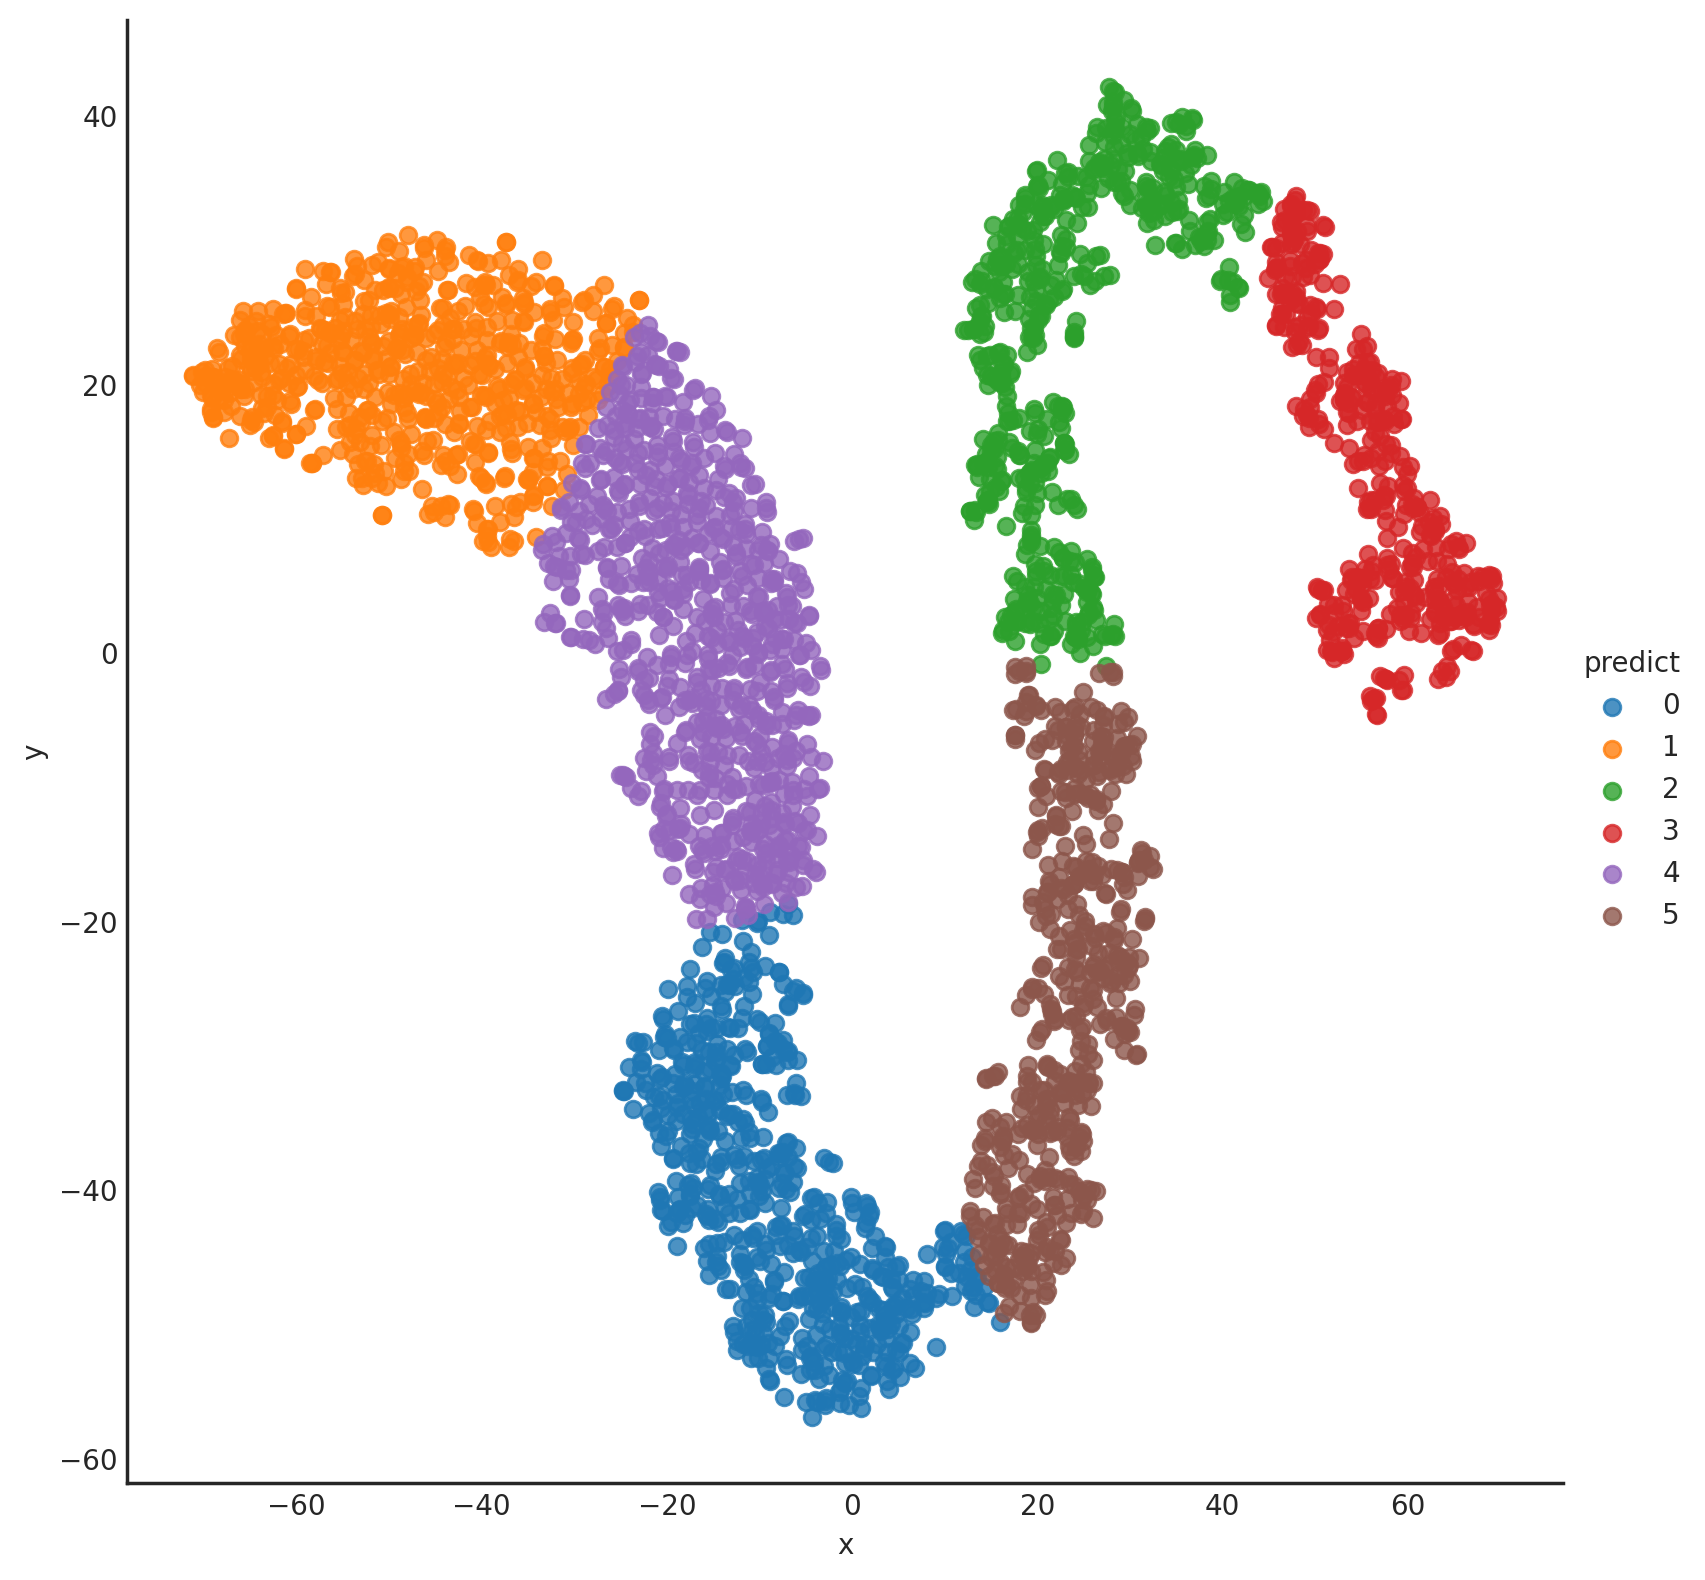

In [56]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(df)
results = df
results['predict'] = predict
sns.lmplot(x= 'x',y= 'y', data=df, fit_reg=False, height=8, hue='predict')
plt.show()


#### DBSCAN

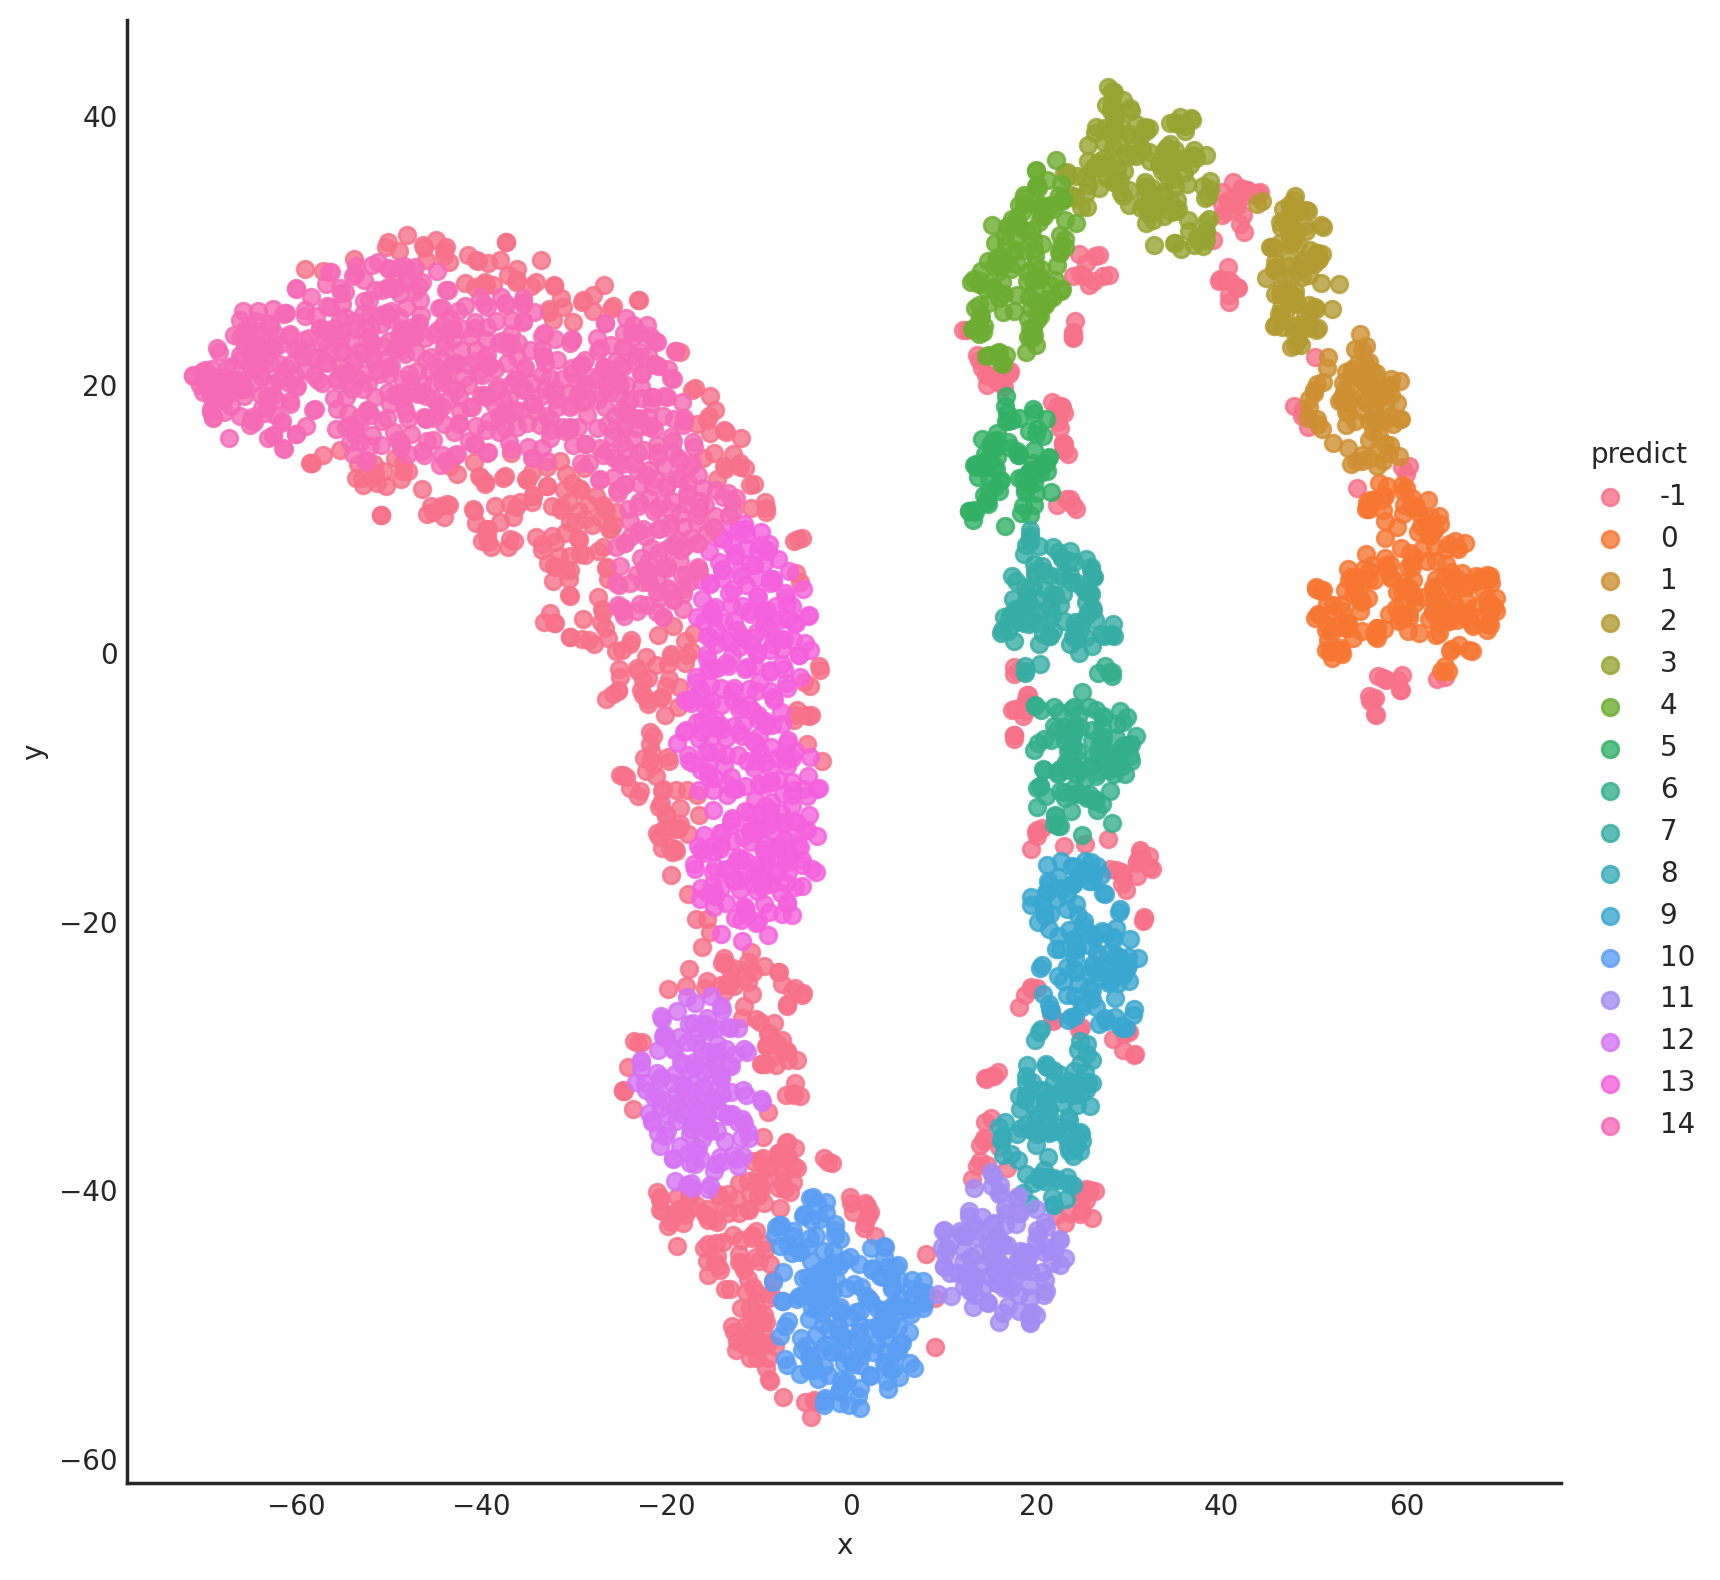

In [102]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=50, eps=4)
predict = dbscan.fit_predict(df)
results = df
results['predict'] = predict
sns.lmplot(x= 'x',y= 'y', data=df, fit_reg=False, height=8, hue='predict')
plt.show()